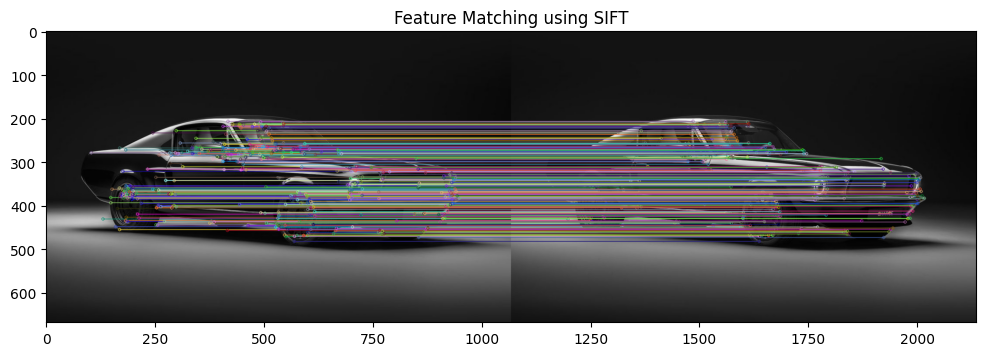

In [4]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load two images
img1 = cv2.imread('/content/dataa.jpg', cv2.IMREAD_GRAYSCALE)  # Query image (grayscale)
img2 = cv2.imread('/content/dataa.jpg', cv2.IMREAD_GRAYSCALE)  # Train image (grayscale)

# Step 2: Initialize the SIFT detector
sift = cv2.SIFT_create()

# Step 3: Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Step 4: Match the descriptors using FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Step 5: Apply the ratio test to remove false matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Step 6: Draw the keypoints and matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Step 7: Display the result
plt.figure(figsize=(12, 6))
plt.imshow(img_matches, cmap='gray')
plt.title('Feature Matching using SIFT')
plt.show()
